In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import all of the datas

In [6]:
bmw=pd.read_csv("car_data/bmw.csv")
audi=pd.read_csv("car_data/audi.csv")
ford=pd.read_csv("car_data/ford.csv")
hyundi=pd.read_csv("car_data/hyundi.csv")
benz=pd.read_csv("car_data/merc.csv")
toyota=pd.read_csv("car_data/toyota.csv")


In [8]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [9]:
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [10]:
ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [11]:
hyundi.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [12]:
benz.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [13]:
toyota.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


## 1. Overview


#### The data sets consist of 9 columns:
-  model: The model of the car; categorical
-  year: The year of which the car was made; numerical
-  price: Selling price for the used cars; numerical
-  mileage: The distance of the car had been drived; numerical
-  fuelType: Categorical->[Petrol,Disel,Hybrid,Electric,other]
-  tax: The amount of the tax of the car; numerical
-  mpg: Energy consumption of the car; miles per gallon; numerical
-  engineSize: The size of the engine; numerical

## 2. Data Check

### 2.1 Consistency

It's easy to see that the feature 'tax' in "hyundi" data frame has a different name with other data frames. So, we need to change the name of it to ensure consistency. Then, we merge the data.

In [15]:
hyundi.rename(columns={'tax(£)': 'tax'}, inplace=True)

frames = [bmw,audi,ford,hyundi,benz,toyota]
merged = pd.concat(frames)

### 2.2 Check Missing Values

In [16]:
merged.isnull().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

 There's no missing values

### 2.3 Check Duplicates

In [28]:
merged.duplicated().sum()

758

In [30]:
merged.drop_duplicates(inplace=True)

### 2.4 Check Data Types

In [31]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63373 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         63373 non-null  object 
 1   year          63373 non-null  int64  
 2   price         63373 non-null  int64  
 3   transmission  63373 non-null  object 
 4   mileage       63373 non-null  int64  
 5   fuelType      63373 non-null  object 
 6   tax           63373 non-null  int64  
 7   mpg           63373 non-null  float64
 8   engineSize    63373 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 4.8+ MB


### 2.5 Unique Values of Each Column

In [33]:
merged.nunique()

model             134
year               27
price           10865
transmission        4
mileage         33533
fuelType            5
tax                48
mpg               186
engineSize         40
dtype: int64

### 2.6 Basic Stats of Numerical Features

In [34]:
merged.describe()

,year,price,mileage,tax,mpg,engineSize
count,63373.000000,63373.000000,63373.000000,63373.000000,63373.000000,63373.000000
mean,2017.020151,18359.714358,23608.468812,120.456030,56.179665,1.753783
std,2.173193,10849.740128,21400.434999,65.664091,17.896790,0.616098
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,10900.000000,7730.000000,125.000000,47.900000,1.300000
50%,2017.000000,15995.000000,17953.000000,145.000000,56.500000,1.700000
75%,2019.000000,22898.000000,33014.000000,145.000000,64.200000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


## 3. Visualization

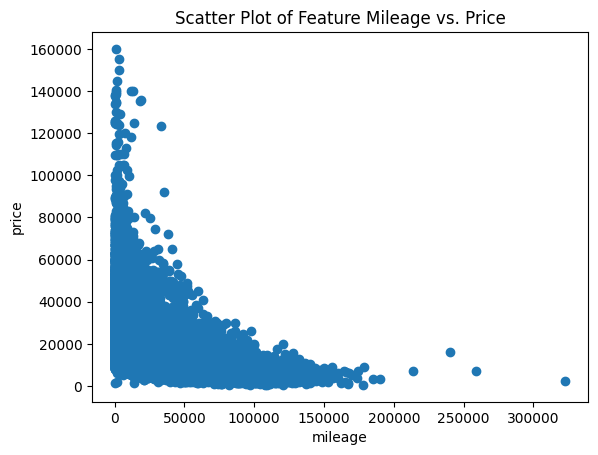

In [45]:
plt.scatter(merged['mileage'], merged['price'])
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('Scatter Plot of Feature Mileage vs. Price')
plt.show()

Price tends to drop when mileage increases